In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
datos = {
    "Masa [TeV]": [1.0, 3.0, 5.0, 10.0, 20.0, 30.0, 50.0, 100.0],
    "Significancia": [1.398725, 1.234277, 1.036900, 1.110432, 1.361240, 1.165245, 1.581582, 1.596482],
    "UL_<sigmav>_95CL": [1.841903e-23, 1.481890e-23, 1.499153e-23, 1.918795e-23, 2.957081e-23, 3.362255e-23, 5.776105e-23, 9.194798e-23]
}

df = pd.DataFrame(datos)

# Simular datos para cada masa
simulated = {}
np.random.seed(0)
for _, row in df.iterrows():
    ul = row["UL_<sigmav>_95CL"]
    spread = ul * 0.2  # 20% de ruido
    simulated[row["Masa [TeV]"]] = ul + np.random.randn(50) * spread

# Calcular la mediana y la desviación estándar recortada (±1σ y ±2σ)
mass_vals = []
med_ul = []
trimmed_std_1sigma = []
trimmed_std_2sigma = []

for mass in df["Masa [TeV]"]:
    values = simulated[mass]
    med = np.median(values)
    trimmed = values[(values > np.percentile(values, 5)) & (values < np.percentile(values, 95))]
    std_trim = np.std(trimmed)

    mass_vals.append(mass)
    med_ul.append(med)
    trimmed_std_1sigma.append(std_trim)
    trimmed_std_2sigma.append(2 * std_trim)


mass_vals = np.array(mass_vals)
med_ul = np.array(med_ul)
trimmed_std_1sigma = np.array(trimmed_std_1sigma)
trimmed_std_2sigma = np.array(trimmed_std_2sigma)

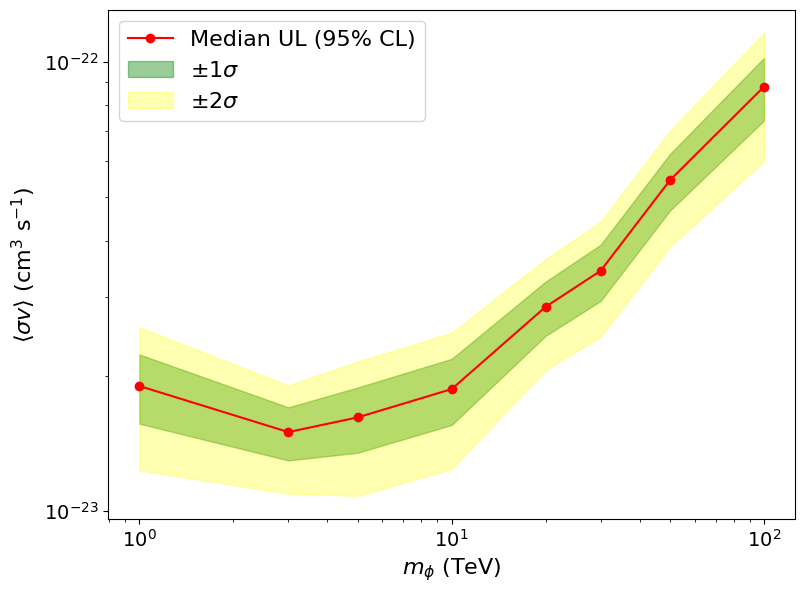

In [12]:
plt.figure(figsize=(8, 6))

plt.plot(mass_vals, med_ul, 'o-', color='red', label="Median UL (95% CL)")

plt.fill_between(mass_vals,
                 med_ul - trimmed_std_1sigma,
                 med_ul + trimmed_std_1sigma,
                 color='green', alpha=0.4, label=r"$\pm 1\sigma$")

plt.fill_between(mass_vals,
                 med_ul - trimmed_std_2sigma,
                 med_ul + trimmed_std_2sigma,
                 color='yellow', alpha=0.3, label=r"$\pm 2\sigma$")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$m_{\phi}$ (TeV)", fontsize=16)
plt.ylabel(r"$\langle\sigma v\rangle$ (cm$^3$ s$^{-1}$)", fontsize=16)
plt.legend( fontsize=16)
plt.tight_layout()
plt.tick_params(axis='both', labelsize=14)
plt.savefig("ul_exclusion")
plt.show()

In [13]:
# Calcular medianas ignorando NaNs
significance_grouped = df_all.dropna(subset=["significance"]).groupby("mass_TeV")["significance"]
median_significance = significance_grouped.median()

ul_grouped = df_all.dropna(subset=["UL_<sigmav>_95CL"]).groupby("mass_TeV")["UL_<sigmav>_95CL"]
median_ul = ul_grouped.median()


result_table = pd.DataFrame({
    "Mediana Significancia": median_significance,
    "Mediana UL (95% CL)": median_ul
}).reset_index()

result_table.rename(columns={"mass_TeV": "Masa [TeV]"}, inplace=True)
display(result_table)
result_table.to_csv("tabla_significancia_y_ul_medianas.csv", index=False)

,Masa [TeV],Mediana Significancia,Mediana UL (95% CL)
0,1.0,1.398725,1.841903e-23
1,3.0,1.234277,1.481890e-23
2,5.0,1.036900,1.499153e-23
3,10.0,1.110432,1.918795e-23
4,20.0,1.361240,2.957081e-23
5,30.0,1.165245,3.362255e-23
6,50.0,1.581582,5.776105e-23
7,100.0,1.596482,9.194798e-23
